In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import PIL.ImageOps
import glob
import os
import matplotlib.image as mpimg
## Data preprocessing for age and gender dataset 04/26 Kun Liang

Populating the interactive namespace from numpy and matplotlib


In [2]:
# DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
# DEVICE

In [3]:
os.getcwd()
data_path = os.getcwd() # '/Users/liangkun/675_Project'

In [5]:

# website: https://talhassner.github.io/home/projects/Adience/Adience-data.html

# '''
# The dataset is composed of 5 folds to allow 5-fold 'leave one out' cross validation. To prevent overfitting, each fold contains different subjects. 

# Each fold is described by a csv file with 12 columns:

# user_id - the folder in the dataset containing the image. 
# original_image - image name in the dataset.
# face_id - the Face ID in the original Flickr image, can be ignored. 
# age - age label of the face.
# gender - gender label of the face.
# x, y, dx, dy - bounding box of the face in the original Flickr image, **can be ignored**.
# tilt_ang, fiducial_yaw_angle - pose of the face in the original Flickr image, **can be ignored**. 
# fiducial_score - score of the landmark detector, **can be ignored**. 

# If you use the dataset, please cite: 
# Eran Eidinger, Roee Enbar, Tal Hassner. Age and Gender Estimation of Unfiltered Faces. Transactions on Information Forensics and Security (IEEE-TIFS), special issue on Facial Biometrics in the Wild, Volume 9, Issue 12, pages 2170 - 2179, 2014.
# '''


In [4]:
# use glob to get all .txt datasets names
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# concatenate all dataset
data_set = pd.concat([pd.read_csv(files,sep='\t') for files in all_filenames ])

# brief look

In [5]:
# brief look
data_set.reset_index()  # (19370, 12)
# dtype
# user_id               object
# original_image        object
# face_id                int64
# age                   object
# gender                object
# x                      int64
# y                      int64
# dx                     int64
# dy                     int64
# tilt_ang               int64
# fiducial_yaw_angle     int64
# fiducial_score         int64
# dtype: object

,index,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,3441,113728563@N05,11827967936_b29e8e87eb_o.jpg,1739,None,NaN,0,0,768,921,0,0,78
19366,3442,113728563@N05,11826123976_c7d6738478_o.jpg,1742,None,NaN,450,906,932,932,0,0,127
19367,3443,113728563@N05,11827955196_c97e4f877d_o.jpg,1743,None,NaN,72,142,560,560,20,0,13
19368,3444,113728563@N05,11826168836_69124b9bdf_o.jpg,1741,None,NaN,0,1284,921,1160,-105,-30,74


# look at missing/null values proportion

In [6]:
# missing/null value summarize:
# there are differences between 'None' and 'Nan'
# 'Nan' is null, 'None' is string 'None'
def null_zero_ratio(dataframe):
    dict_null = {each_column:{} for each_column in dataframe.columns}
    for each_column in dataframe:
        null_num = sum(dataframe[each_column].isnull()==True)
        None_num = sum(dataframe[each_column]=='None')
        null_rate = (null_num + None_num) / dataframe.shape[0]
        dict_null[each_column]['null_number'] = null_num + None_num
        dict_null[each_column]['null_rate'] = null_rate
    return dict_null

In [7]:
dict_ = null_zero_ratio(pd.DataFrame(data_set, columns = ['user_id','face_id','age','gender']))
dict_

{'user_id': {'null_number': 0, 'null_rate': 0.0},
 'face_id': {'null_number': 0, 'null_rate': 0.0},
 'age': {'null_number': 748, 'null_rate': 0.03861641713990707},
 'gender': {'null_number': 779, 'null_rate': 0.040216830149716054}}

# null rate is very low --> personally I think we can drop# null rate is very low --> personally I think we can drop

In [10]:
# null rate is very low --> personally I think we can drop

# data detail check

## 168 unique user id

In [8]:
# basic data check
len(data_set['user_id'].unique()) # 168 unique user_id
data_set[['user_id']].value_counts(ascending=False) # which user appears the most frequent, 'value_counts' excludes nan by default

user_id      
114841417@N06    745
30601258@N03     741
29671106@N00     598
20254529@N04     557
8410632@N03      542
                ... 
113771355@N07      2
68666269@N03       2
50458575@N08       2
104937236@N08      1
10693681@N00       1
Length: 168, dtype: int64

## 2284 unique face_id

In [9]:
len(data_set['face_id'].unique()) # 2284 unique face_id
data_set[['face_id']].value_counts(ascending=False) # which face_id appears the most, out of curiosity
# 2 appears the most

face_id
2          417
1317       399
186        314
84         238
911        225
          ... 
778          1
776          1
775          1
774          1
2284         1
Length: 2284, dtype: int64

# 30 unique age range, ranges are wierd and need to be processed

In [10]:
len(data_set['age'].unique()) # 30 unique age range
data_set[['age']].value_counts(ascending=False) # mostly are between 25~32 --> a little bit dirty data
# wierd thing: (0,2) has 2488 values?

age      
(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
32              3
56              2
(8, 23)         1
42              1
46              1
dtype: int64

# balanced numbers for Male & Female

In [11]:
data_set['gender'].unique() # 4 different age: ['f', 'm', nan, 'u']
data_set[['gender']].value_counts(ascending=False)

gender
f         9372
m         8120
u         1099
dtype: int64

# drop Nan/Null

In [12]:
# drop None
data_set_0 = data_set[data_set['age'] != 'None']
# sum(data_set_0['age'] == 'None'): 0

# drop Nan 
data_set_0 = data_set_0.dropna()

In [13]:
dict_0 = null_zero_ratio(pd.DataFrame(data_set_0, columns = ['user_id','face_id','age','gender']))
dict_0
# all Nan/Null dropped: checked

{'user_id': {'null_number': 0, 'null_rate': 0.0},
 'face_id': {'null_number': 0, 'null_rate': 0.0},
 'age': {'null_number': 0, 'null_rate': 0.0},
 'gender': {'null_number': 0, 'null_rate': 0.0}}

# tag labels for different age groups 


In [32]:
# use map function 
# 04/24 version 1: map age to '0: child', '1: teens & adult', '2: elder'
# age_to_label_map = {
#     '(0, 2)'  :0,
#     '2':0,
#     '3':0,
#     '(4, 6)'  :0,
#     '(8, 12)' :0,
#     '13':0,
#     '(15, 20)':1,
#     '22':1,
#     '23':1,
#     '(8, 23)':1,
#     '(25, 32)':1,
#     '(27, 32)':1,
#     '29':1,
#     '32':1,
#     '34':1,
#     '35':1,
#     '36':1,
#     '(38, 43)':1,
#     '(38, 42)':1,
#     '42':1,
#     '45':1,
#     '46':1,
#     '(38, 48)':1,
#     '(48, 53)':1,
#     '55':2,
#     '56':2,
#     '57':2,
#     '58':2,
#     '(60, 100)':2
# }

In [14]:
# 05/01 version 2: still keep 8 labels, redifine age groups, filling age gaps between each age group
# [0-4): 0
# [4-8): 1
# [8-15): 2
# [15-25): 3
# [25-38): 4
# [38-48): 5
# [48-60): 6
# [60-100): 7

age_to_label_map = {
    '(0, 2)'  :0,
    '2':0,
    '3':0,
    '(4, 6)'  :1,
    '(8, 12)' :2,
    '(8, 23)':2, # only 1 data point
    '13':2,
    '(15, 20)':3,
    '22':3,
    '23':3,
    '(25, 32)':4,
    '(27, 32)':4,
    '29':4,
    '32':4,
    '34':4,
    '35':4,
    '36':4,
    '(38, 43)':5,
    '(38, 42)':5,
    '42':5,
    '45':5,
    '46':5,
    '(38, 48)':5,
    '(48, 53)':6,
    '55':6,
    '56':6,
    '57':6,
    '58':6,
    '(60, 100)':7
}

In [15]:
# perform map
data_set_0['age_'] = data_set_0['age'].map(age_to_label_map)

In [16]:
# check if they are all mapped
print('the lable of age now becomes:' + str(data_set_0['age_'].unique()))
data_set_0[['age_']].value_counts(ascending=False, dropna=False)

the lable of age now becomes:[7 6 1 5 2 3 4 0]


age_
4       5495
0       2509
5       2435
2       2288
1       2140
3       1887
6        930
7        867
dtype: int64

## Age plot

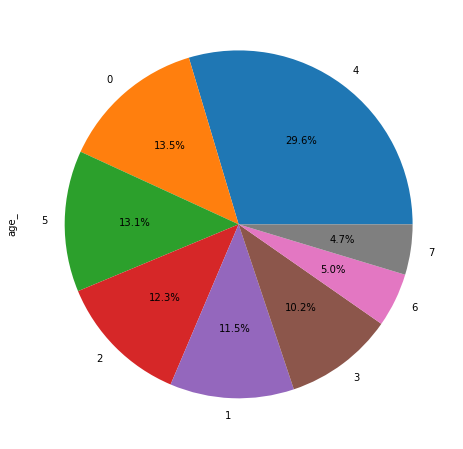

In [17]:
plt.figure(1, figsize=(8,8))
data_set_0.age_.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# tag labels for gender
* 0: female
* 1: male 
* 2: unisex --> (undefined)

In [18]:
# map age to '0: child', '1: teens & adult', '2: elder'
gender_to_label_map = {
    'f':0,
    'm':1,
    'u':2
}
# perform map
data_set_0['gender_'] = data_set_0['gender'].map(gender_to_label_map)

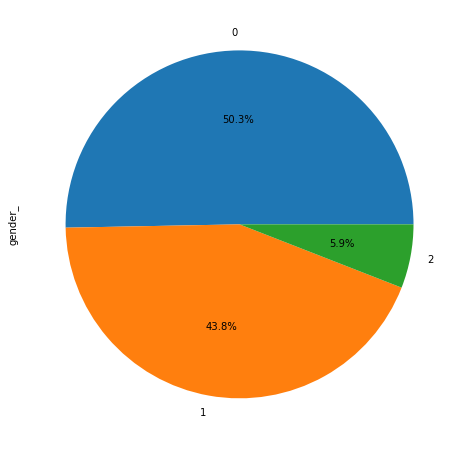

In [19]:
plt.figure(1, figsize=(8,8))
data_set_0.gender_.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## look at what does 'u' in gender tells us 
* mostly are 0-2 infants --> drop

In [20]:
data_u = data_set_0[data_set_0['gender_']==2]
data_u

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_,gender_
2700,8034587@N06,11299390836_0e5e2ba387_o.jpg,700,"(0, 2)",u,239,384,2040,2040,-80,15,67,0,2
2701,8034587@N06,11299000103_2e0c2494a9_o.jpg,700,"(0, 2)",u,293,320,1810,1810,-100,0,47,0,2
2705,8034587@N06,11299440883_599e709d5c_o.jpg,700,"(0, 2)",u,438,570,1288,1288,-105,30,56,0,2
2707,8034587@N06,11299134505_15793585d9_o.jpg,700,"(0, 2)",u,31,688,848,848,-110,0,117,0,2
2708,8034587@N06,11299523154_1fc4b1f467_o.jpg,700,"(0, 2)",u,953,847,981,982,-110,30,47,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,22815721@N06,11465751613_c3ee9d60a6_o.jpg,1639,"(0, 2)",u,0,451,1875,2173,-5,30,63,0,2
3209,22815721@N06,11732633334_89c45acc89_o.jpg,1639,"(0, 2)",u,122,855,1938,1938,20,-45,9,0,2
3213,22815721@N06,11855276243_a7f5602687_o.jpg,1639,"(0, 2)",u,653,443,1562,1561,-15,30,15,0,2
3216,22815721@N06,11732850916_f996f955fd_o.jpg,1639,"(0, 2)",u,0,156,2448,2875,0,0,117,0,2


In [21]:
print('the age group for u of gender is: ' + str(data_u['age'].unique()))
data_u.age.value_counts() 

the age group for u of gender is: ['(0, 2)' '(8, 12)' '(25, 32)' '(4, 6)' '(60, 100)' '(15, 20)']


(0, 2)       1091
(8, 12)         2
(25, 32)        2
(15, 20)        2
(4, 6)          1
(60, 100)       1
Name: age, dtype: int64

##  drop undefined age group pictures, because most of them are 0-2 age infants

In [22]:
data_set_0 = data_set_0[data_set_0['gender_'] != 2]

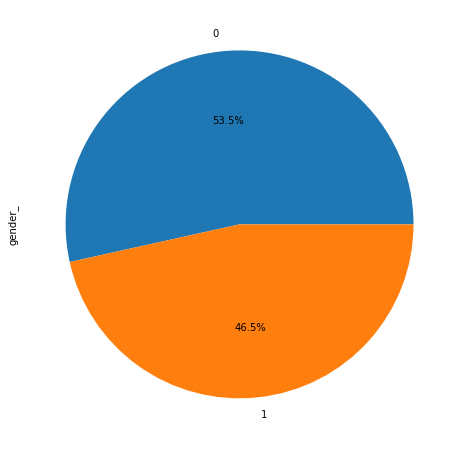

In [23]:
plt.figure(1, figsize=(8,8))
data_set_0.gender_.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# plot jpeg, and later convert it to pickle

In [25]:
data_set_1 = data_set_0.copy()
data_set_1 = data_set_1.reset_index()
data_set_1

,index,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_,gender_
0,0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118,7,0
1,1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35,6,1
2,2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168,1,0
3,3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27,1,0
4,4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17447,3416,7610270@N03,9362346126_f9ef6d731a_o.jpg,1733,"(25, 32)",m,688,1458,669,669,-85,0,95,4,1
17448,3417,7610270@N03,10162156533_3e27843d55_o.jpg,1734,"(25, 32)",f,619,1281,638,637,195,0,119,4,0
17449,3418,10466455@N02,11922993085_634a1193fa_o.jpg,1735,"(38, 43)",m,1319,109,1237,1237,-5,0,93,5,1
17450,3419,10466455@N02,11923013085_05915054c5_o.jpg,1735,"(38, 43)",m,1644,787,262,261,-15,0,76,5,1


In [35]:
# %cd '/Users/liangkun/675_Project/faces'

In [39]:
# len(glob.glob('*')) # faces folder has all the user_id: 168

In [34]:
# print('user_id' + str(data_set_1.user_id[0]))
# print('face_id' + str(data_set_1.face_id[0]))

# try to plot the 1st image

In [37]:
# get image path
# img_path00 = data_path + "/faces/"+data_set_1.user_id[0]+"/coarse_tilt_aligned_face."+str(data_set_1.face_id[0])+"."+data_set_1.original_image[0]
# img_path00

'/Users/liangkun/675_Project/faces/114841417@N06/coarse_tilt_aligned_face.481.12068804204_085d553238_o.jpg'

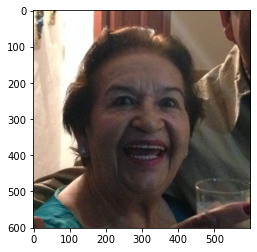

In [38]:
# img00 = PIL.Image.open(img_path00)
# imgplot = plt.imshow(img00)
# plt.show()

In [362]:
# np.array(img00).shape

(601, 600, 3)

# transfer from RGB to grayscale 

### 1st way

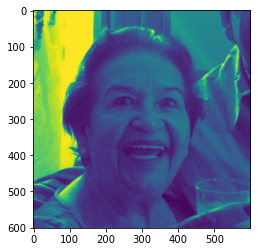

In [39]:
# image00 = PIL.Image.open(img_path00)
# gray_image00 = PIL.ImageOps.grayscale(image00)
# imgplot = plt.imshow(gray_image00)
# plt.show()

In [40]:
# np.array(gray_image00)

array([[251, 249, 251, ...,  60,  62,  62],
       [246, 242, 246, ...,  57,  55,  52],
       [250, 244, 237, ...,  59,  57,  55],
       ...,
       [ 45,  46,  48, ...,  93,  91,  86],
       [ 45,  46,  48, ...,  87,  88,  86],
       [ 43,  43,  45, ...,  88,  86,  85]], dtype=uint8)

### 2nd way to check whether the image is the greyscaled or not

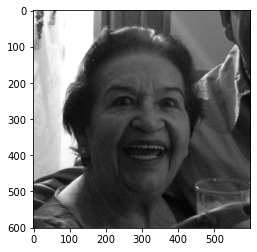

In [41]:
# img00 = mpimg.imread(img_path00)
# R = img00[:,:,0]
# G = img00[:,:,1]
# B = img00[:,:,2]
# imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
# plt.imshow(imgGray,cmap='gray')
# plt.show()

In [42]:
# np.array(imgGray)

array([[250.4945, 249.2065, 250.9675, ...,  60.0606,  62.0604,  62.2884],
       [245.8047, 241.8051, 246.1637, ...,  57.0609,  55.2891,  52.2894],
       [249.9075, 243.8758, 236.8765, ...,  59.0607,  57.2889,  55.2891],
       ...,
       [ 44.8771,  45.877 ,  48.1757, ...,  93.2267,  90.7539,  85.7544],
       [ 44.9911,  45.991 ,  47.7027, ...,  87.2273,  88.2272,  86.2274],
       [ 43.2794,  42.9913,  44.9911, ...,  87.9992,  86.2274,  85.2275]])

# transfer from greyscale jpeg to np.array

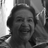

In [43]:
# downsize_image00 = gray_image00.resize((48,48),Image.ANTIALIAS)
# downsize_image00

In [44]:
# np.array(downsize_image00)

array([[210, 115, 191, ...,  72,  61,  59],
       [180,  99, 221, ...,  81,  57,  58],
       [211, 129, 219, ...,  88,  53,  52],
       ...,
       [113, 105, 109, ...,  44,  50,  52],
       [ 62,  71,  70, ...,  52,  76,  96],
       [ 51,  61,  67, ...,  75,  93,  95]], dtype=uint8)

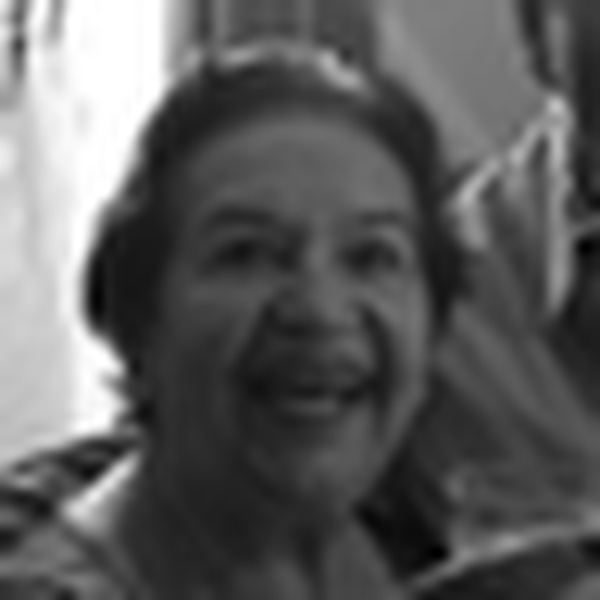

In [45]:
# blowup_image = downsize_image00.resize((600, 600),Image.ANTIALIAS)
# blowup_image

In [46]:
# downsize_image00 = np.array(downsize_image00) 

In [47]:
# downsize_image00.shape

(48, 48)

In [49]:
downsize_image00

array([[210, 115, 191, ...,  72,  61,  59],
       [180,  99, 221, ...,  81,  57,  58],
       [211, 129, 219, ...,  88,  53,  52],
       ...,
       [113, 105, 109, ...,  44,  50,  52],
       [ 62,  71,  70, ...,  52,  76,  96],
       [ 51,  61,  67, ...,  75,  93,  95]], dtype=uint8)

# write a function to batch transfer

## 1. first let's have a column storing the image path

In [26]:
img_path = []
for row in data_set_1.iterrows():
    # each row is a tuple, 1st element is the index, 2nd element is the info
    path = data_path + "/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

# add this list to dataframe
data_set_1['img_path'] = img_path

In [27]:
data_set_1

,index,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_,gender_,img_path
0,0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118,7,0,/Users/liangkun/675_Project/faces/114841417@N0...
1,1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35,6,1,/Users/liangkun/675_Project/faces/114841417@N0...
2,2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168,1,0,/Users/liangkun/675_Project/faces/114841417@N0...
3,3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27,1,0,/Users/liangkun/675_Project/faces/114841417@N0...
4,4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11,5,0,/Users/liangkun/675_Project/faces/114841417@N0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17447,3416,7610270@N03,9362346126_f9ef6d731a_o.jpg,1733,"(25, 32)",m,688,1458,669,669,-85,0,95,4,1,/Users/liangkun/675_Project/faces/7610270@N03/...
17448,3417,7610270@N03,10162156533_3e27843d55_o.jpg,1734,"(25, 32)",f,619,1281,638,637,195,0,119,4,0,/Users/liangkun/675_Project/faces/7610270@N03/...
17449,3418,10466455@N02,11922993085_634a1193fa_o.jpg,1735,"(38, 43)",m,1319,109,1237,1237,-5,0,93,5,1,/Users/liangkun/675_Project/faces/10466455@N02...
17450,3419,10466455@N02,11923013085_05915054c5_o.jpg,1735,"(38, 43)",m,1644,787,262,261,-15,0,76,5,1,/Users/liangkun/675_Project/faces/10466455@N02...


## 2. adding a column storing the image array


In [28]:
img_array = []
for row in data_set_1.iterrows():
    # each row is a tuple, 1st element is the index, 2nd element is the info
    image = PIL.Image.open(row[1].img_path)
    gray_image = PIL.ImageOps.grayscale(image)
#     04/25 version1 reduce the picture size:
    downsize_image = gray_image.resize((48,48),Image.ANTIALIAS)
    downsize_image_array = np.array(downsize_image)
    img_array.append(downsize_image_array)

#     05/01 version 2: no down_size because we can reduce it in pytorch/tensorflow
#     image_array = np.array(gray_image)
#     img_array.append(image_array)
    

In [29]:
data_set_1['image_array'] = img_array

In [30]:
data_set_1

,index,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,age_,gender_,img_path,image_array
0,0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118,7,0,/Users/liangkun/675_Project/faces/114841417@N0...,"[[210, 115, 191, 249, 152, 229, 255, 254, 255,..."
1,1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35,6,1,/Users/liangkun/675_Project/faces/114841417@N0...,"[[0, 0, 0, 0, 0, 0, 2, 0, 72, 150, 139, 143, 1..."
2,2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168,1,0,/Users/liangkun/675_Project/faces/114841417@N0...,"[[0, 0, 0, 3, 14, 13, 7, 2, 2, 3, 4, 12, 22, 3..."
3,3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27,1,0,/Users/liangkun/675_Project/faces/114841417@N0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 40, 126, 108, ..."
4,4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11,5,0,/Users/liangkun/675_Project/faces/114841417@N0...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17447,3416,7610270@N03,9362346126_f9ef6d731a_o.jpg,1733,"(25, 32)",m,688,1458,669,669,-85,0,95,4,1,/Users/liangkun/675_Project/faces/7610270@N03/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 16, 30, 46,..."
17448,3417,7610270@N03,10162156533_3e27843d55_o.jpg,1734,"(25, 32)",f,619,1281,638,637,195,0,119,4,0,/Users/liangkun/675_Project/faces/7610270@N03/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0,..."
17449,3418,10466455@N02,11922993085_634a1193fa_o.jpg,1735,"(38, 43)",m,1319,109,1237,1237,-5,0,93,5,1,/Users/liangkun/675_Project/faces/10466455@N02...,"[[0, 7, 96, 158, 237, 255, 222, 160, 114, 110,..."
17450,3419,10466455@N02,11923013085_05915054c5_o.jpg,1735,"(38, 43)",m,1644,787,262,261,-15,0,76,5,1,/Users/liangkun/675_Project/faces/10466455@N02...,"[[0, 0, 0, 3, 0, 119, 222, 228, 250, 255, 255,..."


## only need 3 columns, image_array, age_stage, gender

In [31]:
# select 3 columns
data_set_ = data_set_1[['image_array','age_','gender_']]
# rename
data_set_.columns = [['image_array','age_stage','gender']]

In [32]:
# check
data_set_

,image_array,age_stage,gender
0,"[[210, 115, 191, 249, 152, 229, 255, 254, 255,...",7,0
1,"[[0, 0, 0, 0, 0, 0, 2, 0, 72, 150, 139, 143, 1...",6,1
2,"[[0, 0, 0, 3, 14, 13, 7, 2, 2, 3, 4, 12, 22, 3...",1,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 40, 126, 108, ...",1,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",5,0
...,...,...,...
17447,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 16, 30, 46,...",4,1
17448,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0,...",4,0
17449,"[[0, 7, 96, 158, 237, 255, 222, 160, 114, 110,...",5,1
17450,"[[0, 0, 0, 3, 0, 119, 222, 228, 250, 255, 255,...",5,1


In [57]:
data_set_.dtypes

image_array    object
age_stage       int64
gender          int64
dtype: object

In [58]:
type(data_set_)

pandas.core.frame.DataFrame

### out of curiosity, chech the 2nd image

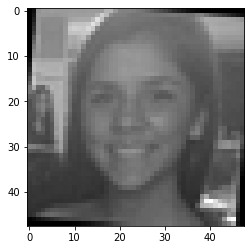

In [33]:
pic12 = data_set_['image_array'].iloc[12][0]
plt.imshow(pic12,cmap='gray')

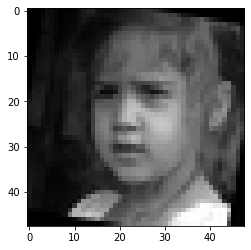

In [34]:
pic2 = data_set_['image_array'].iloc[2][0]
plt.imshow(pic2,cmap='gray')

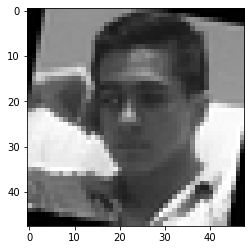

In [35]:
pic9 = data_set_['image_array'].iloc[9][0]
plt.imshow(pic9,cmap='gray')

# big discovery, there are random rotations in the dataset

In [ ]:
# no need to do tt.random rotation

# seperate dataset to train, val, test
## 1. we have 17452 data --> seperate to train 0.6, val 0.2, test 0.2

In [36]:
train, validate, test = \
              np.split(data_set_.sample(frac=1, random_state=675), 
                       [int(.6*len(data_set_)), int(.8*len(data_set_))])

In [37]:
print('train shape: ' + str(train.shape))
print('val shape: ' + str(validate.shape))
print('test shape: '+ str(test.shape))

train shape: (10471, 3)
val shape: (3490, 3)
test shape: (3491, 3)


In [38]:
# seperate each dataset to 3 dataframes, image, age, gender, and preserve it to pickle
# train
img_array_train = train[['image_array']]
age_groups_train = train[['age_stage']]
gender_train = train[['gender']]

# val
img_array_val = validate[['image_array']]
age_groups_val = validate[['age_stage']]
gender_val = validate[['gender']]

# test 
img_array_test = test[['image_array']]
age_groups_test = test[['age_stage']]
gender_test = test[['gender']]

## check if the index is aligned --> yes

In [39]:
img_array_val

,image_array
10007,"[[0, 1, 0, 24, 112, 109, 101, 100, 109, 113, 1..."
12217,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 10, 1..."
4960,"[[0, 5, 62, 71, 77, 99, 103, 99, 127, 132, 141..."
6971,"[[250, 252, 252, 255, 255, 255, 255, 255, 255,..."
14817,"[[1, 0, 0, 1, 1, 1, 2, 1, 3, 2, 0, 0, 0, 0, 0,..."
...,...
14847,"[[45, 42, 46, 46, 53, 43, 55, 68, 44, 42, 46, ..."
15250,"[[203, 139, 122, 59, 58, 58, 59, 89, 112, 99, ..."
3308,"[[0, 1, 11, 12, 12, 12, 12, 12, 14, 26, 106, 7..."
185,"[[0, 0, 0, 3, 14, 13, 7, 2, 2, 3, 4, 12, 22, 3..."


In [40]:
age_groups_val

,age_stage
10007,7
12217,0
4960,0
6971,4
14817,7
...,...
14847,2
15250,1
3308,7
185,1


In [41]:
gender_val

,gender
10007,1
12217,0
4960,1
6971,1
14817,0
...,...
14847,1
15250,0
3308,1
185,0


## preserving 3 seperate pickle for train, val, test
1. image array
2. age stage
3. gender

In [42]:
data_path

'/Users/liangkun/675_Project'

In [43]:
# to pickle
df_name = ['img_array_train','age_groups_train','gender_train','img_array_val','age_groups_val','gender_val','img_array_test','age_groups_test','gender_test']
df_list = [img_array_train,age_groups_train,gender_train,img_array_val,age_groups_val,gender_val,img_array_test,age_groups_test,gender_test]
for i in range(len(df_list)):
    df_list[i].to_pickle(data_path + '/' + df_name[i] + '.pkl')


In [108]:
# read on pickle to see if it works
# df1=pd.read_pickle(data_path + "/img_array.pkl")
# df2=pd.read_pickle(data_path + '/age_stage.pkl')
# df3=pd.read_pickle(data_path + '/gender.pkl')
df01 = pd.read_pickle(data_path + "/img_array_train.pkl")
df01

,image_array
9738,"[[151, 152, 154, 154, 152, 149, 149, 151, 153,..."
2043,"[[49, 68, 74, 75, 66, 86, 102, 99, 131, 167, 1..."
9262,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
16875,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
11391,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3080,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5719,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
13247,"[[163, 159, 157, 157, 155, 153, 156, 154, 163,..."


In [107]:
df02 = pd.read_pickle(data_path + "/age_groups_train.pkl")
df02

,age_stage
9738,2
2043,4
9262,4
7946,1
16875,4
...,...
11391,4
3080,5
5719,5
13247,5


# check if they can be img.plot

In [109]:
df01.iloc[9][0]

array([[ 61,  62,  64, ..., 143, 143, 140],
       [ 59,  60,  62, ..., 141, 142, 140],
       [ 58,  57,  60, ..., 139, 140, 139],
       ...,
       [219, 219, 216, ..., 150, 143, 139],
       [220, 217, 215, ..., 158, 151, 146],
       [222, 217, 216, ..., 166, 163, 155]], dtype=uint8)

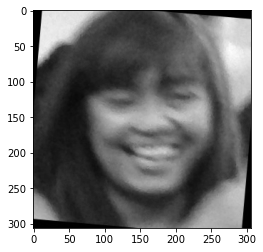

In [113]:
# checked
plt.imshow(df01.iloc[100][0],cmap='gray')